In [5]:
import numpy as np
import pandas as pd

# Gathering the Data

In [6]:
#importing the raw dataset
ds = pd.read_csv("train.csv")

In [7]:
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Preprocessing and Visualizing

In [8]:
# taking out only the features we need in new
features = ["GrLivArea", "BedroomAbvGr", "FullBath", "SalePrice"]

In [9]:
df = ds[features]

In [10]:
df.shape

(1460, 4)

In [11]:
df.sample(10)

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
780,1253,3,2,176000
1249,988,3,1,119000
1116,1419,3,2,184100
1438,1236,2,1,149700
276,1560,3,2,201000
1264,1337,2,2,181000
491,1578,3,1,133000
1295,1052,3,1,138500
234,1960,4,2,216500
457,1663,2,1,256000


In [12]:
df.rename(columns={'GrLivArea':'Sqr.Ft', 'BedroomAbvGr':'No of Bedroom', 'FullBath':'No of Bathroom'}, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2120\1207529237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'GrLivArea':'Sqr.Ft', 'BedroomAbvGr':'No of Bedroom', 'FullBath':'No of Bathroom'}, inplace = True)


In [13]:
df.sample(5)

,Sqr.Ft,No of Bedroom,No of Bathroom,SalePrice
1356,892,3,1,110000
539,1601,3,2,272000
1266,1889,4,1,122000
982,1266,2,2,159895
925,1126,3,2,175000


# Datatype of the columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sqr.Ft          1460 non-null   int64
 1   No of Bedroom   1460 non-null   int64
 2   No of Bathroom  1460 non-null   int64
 3   SalePrice       1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


# Find missing values?

In [15]:
df.isnull().sum() # returns a pandas series of number of missing values

Sqr.Ft            0
No of Bedroom     0
No of Bathroom    0
SalePrice         0
dtype: int64

# Mathematical outlook of the DataFrame

In [16]:
df.describe()

,Sqr.Ft,No of Bedroom,No of Bathroom,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,180921.195890
std,525.480383,0.815778,0.550916,79442.502883
min,334.000000,0.000000,0.000000,34900.000000
25%,1129.500000,2.000000,1.000000,129975.000000
50%,1464.000000,3.000000,2.000000,163000.000000
75%,1776.750000,3.000000,2.000000,214000.000000
max,5642.000000,8.000000,3.000000,755000.000000


# Visualize the Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

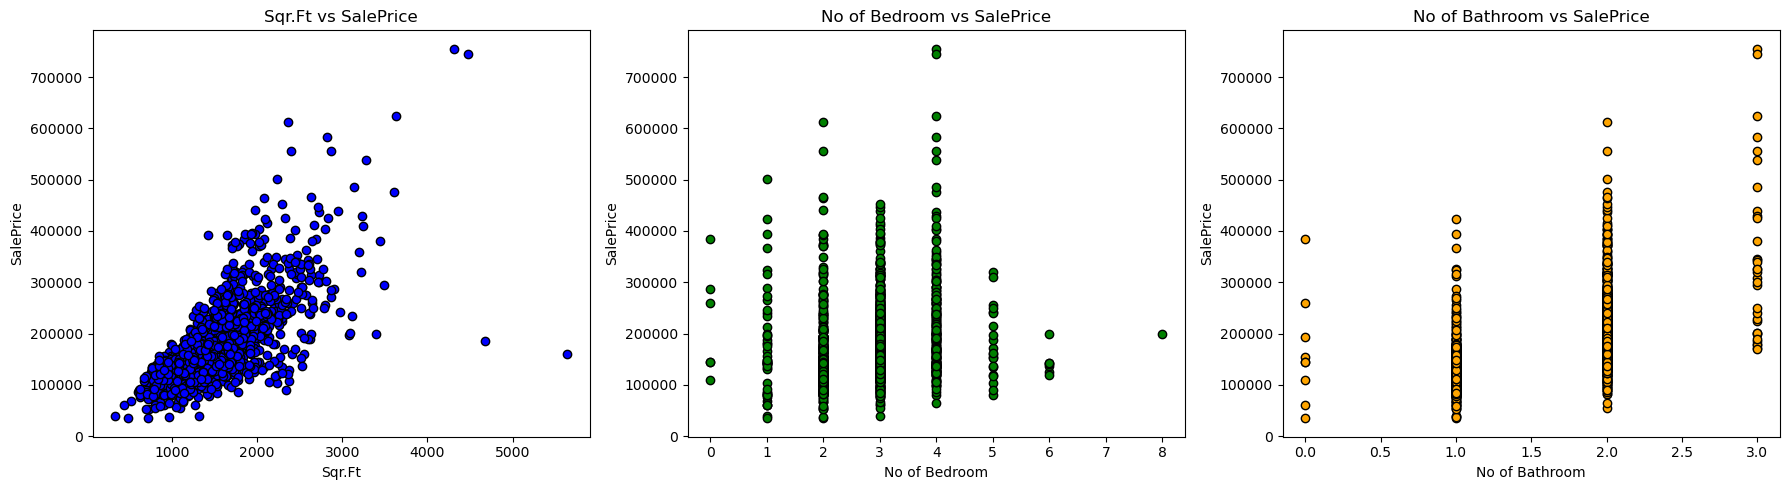

In [51]:
# Scatter Plots (Feature vs Saleprice)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(df['Sqr.Ft'], df['SalePrice'], color='blue', edgecolor='k')
axs[0].set_xlabel('Sqr.Ft')
axs[0].set_ylabel('SalePrice')
axs[0].set_title('Sqr.Ft vs SalePrice')

axs[1].scatter(df['No of Bedroom'], df['SalePrice'], color='green', edgecolor='k')
axs[1].set_xlabel('No of Bedroom')
axs[1].set_ylabel('SalePrice')
axs[1].set_title('No of Bedroom vs SalePrice')

axs[2].scatter(df['No of Bathroom'], df['SalePrice'], color='orange', edgecolor='k')
axs[2].set_xlabel('No of Bathroom')
axs[2].set_ylabel('SalePrice')
axs[2].set_title('No of Bathroom vs SalePrice')

plt.tight_layout()
plt.show()

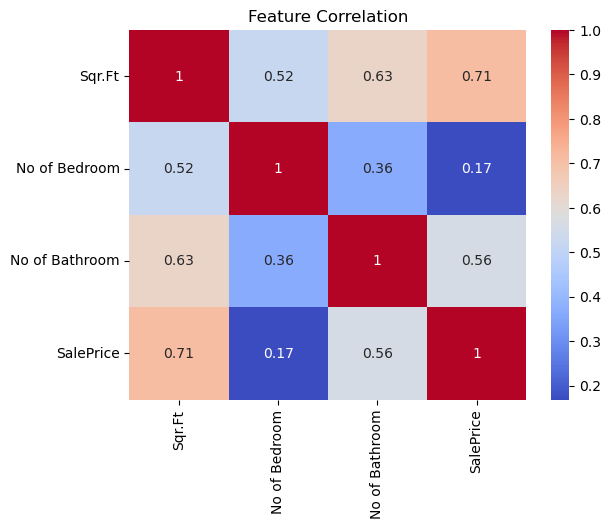

In [58]:
# Correlation Heatmap 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Extract Features and Label cols

In [21]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [59]:
X

,Sqr.Ft,No of Bedroom,No of Bathroom
0,1710,3,2
1,1262,3,2
2,1786,3,2
3,1717,3,1
4,2198,4,2
...,...,...,...
1455,1647,3,2
1456,2073,3,2
1457,2340,4,2
1458,1078,2,1


In [57]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# 10 % of data to test and 90% to train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [26]:
# Check the splits
# X_train
# X_test
# y_train
# y_test

# Standardizing the dataset

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# create object of the above class
scaler = StandardScaler()
# StandardScaler() scales the data so that each feature has: Mean = 0, Standard deviation = 1
# This process is called standardization (z-score normalization). z = x-μ/σ
# μ = mean of the column, σ = standard deviation of the column

In [29]:
X_train = scaler.fit_transform(X_train) # fit transform analyses what's in the data and then transform

In [30]:
X_test = scaler.transform(X_test) # fit_transform() is used on the training data to learn
                                  # the scaling or transformation parameters and then apply
                                  # the same transformation to the training data. transform()
                                  # is used on test data to apply the same transformation
                                  # that was learned from the training data.

# Model Training

In [31]:
from sklearn.linear_model import LinearRegression
# Cross-validation reduces variance by testing the model on multiple train-test splits.
from sklearn.model_selection import cross_val_score

In [32]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

# Prediction

In [62]:
reg_pred = regression.predict(X_test)

# Accuracy

In [39]:
from sklearn.metrics import r2_score

In [40]:
score = r2_score(y_test, reg_pred)

In [41]:
score

0.6197287355345593

# Accuracy of predictions via plots

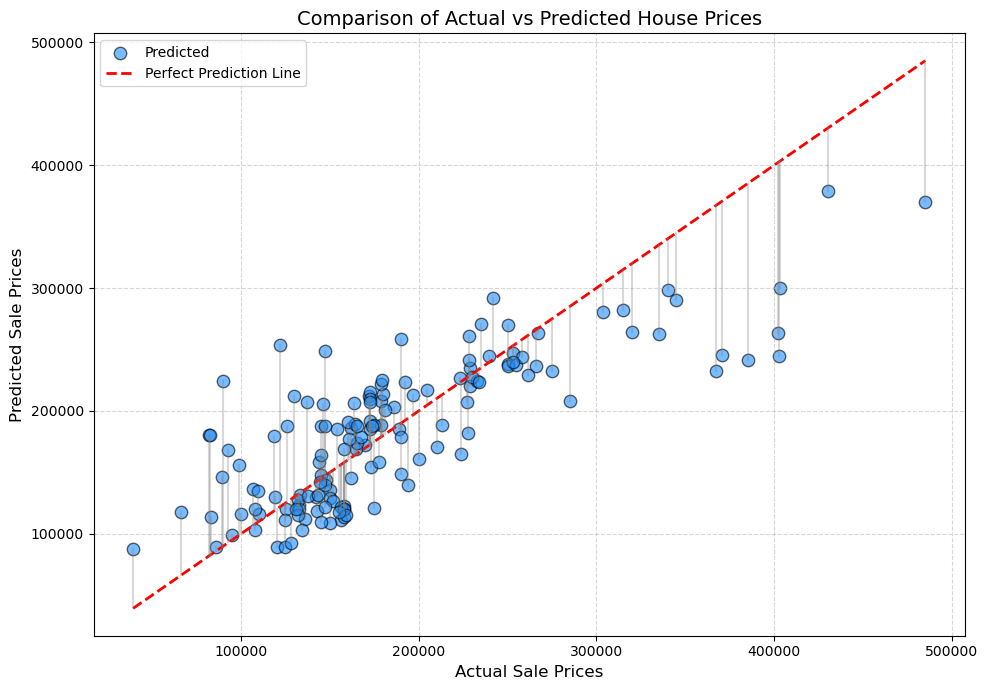

In [67]:
plt.figure(figsize=(10, 7))

plt.scatter(y_test, reg_pred, color='dodgerblue', alpha=0.6, edgecolor='k', s=80, label='Predicted')

# Line for perfect predictions
max_val = max(max(y_test), max(reg_pred))
min_val = min(min(y_test), min(reg_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

#  error lines 
for actual, predicted in zip(y_test, reg_pred):
    plt.plot([actual, actual], [actual, predicted], color='gray', alpha=0.3)  # Vertical line from predicted to actual

plt.xlabel("Actual Sale Prices", fontsize=12)
plt.ylabel("Predicted Sale Prices", fontsize=12)
plt.title("Comparison of Actual vs Predicted House Prices", fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Comparison Table

In [73]:
actual = y_test.values.flatten()
predicted = reg_pred.flatten()

comparison_df = pd.DataFrame({
    'Actual': actual,
    'Predicted': predicted
})

comparison_df['Predicted'] = comparison_df['Predicted'].round(2)

print(comparison_df.sample(10))


     Actual  Predicted
71   137500  130466.30
112  107900  120276.81
131  430000  379318.07
46   125500  119747.77
64   178900  188201.08
29   132000  127810.56
53   164000  189263.68
9    132500  123567.70
102  258000  243485.45
19   148000  143940.65
